In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from importHelpers.response import *
from mlxtend.preprocessing import minmax_scaling

In [4]:
# FILENAME
xlsx_filename = "data\\191022_Areas1-7.xlsx"
excel = pd.ExcelFile(xlsx_filename)

In [5]:
def transform(initial, ind):
    # remove and subtract baseline
    c = frameToSecDF(initial.sub(initial['baseline'], axis = 'rows').drop('baseline', axis = 1).T)
    # drop 70
    a = [a - b > 70 for a, b in zip(list(c.max(axis = 1)), list(c.min(axis= 0)))]
    dropped = []
    for i in range(len(a)):
        if not a[i]:
            dropped.append(list(c.T)[i])
    c = c.drop(dropped, axis = 0)
    # -1 1 scale
    last = c[c.columns[-15:]]
    last = last.mean(axis=1)
    ne = c.sub(last, axis = 0)
    n_one = ne.div(ne.abs().max(axis = 1), axis = 0)
    l = lambda name: "sheet" + str(ind) + '_' + name
    n_one = n_one.rename(index = l)
    return n_one

In [20]:
# ADD ALL SHEETS
i = 0
total = transform(pd.read_excel(xlsx_filename,sheet_name=excel.sheet_names[i], header=0), i)
for i in range(len(excel.sheet_names)):
    print('Working on sheet ' + str(i + 1) + ' of ' + str(len(excel.sheet_names)))
    total = total.append(transform(pd.read_excel(xlsx_filename,sheet_name=excel.sheet_names[i], header=0), i))
print("Sheet combination complete.")
n = total

Working on sheet 1 of 7
Working on sheet 2 of 7
Working on sheet 3 of 7
Working on sheet 4 of 7
Working on sheet 5 of 7
Working on sheet 6 of 7
Working on sheet 7 of 7
Sheet combination complete.


In [8]:
#pca
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from importHelpers.response import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(n)
principalDf = pd.DataFrame(data = principalComponents)
pca_n = pd.DataFrame(data = pca.inverse_transform(principalComponents))
pca_n = pca_n.rename(index={a:b for a,b in zip(range(len(list(n.T))),list(n.T))}, columns={a:b for a,b in zip(range(len(list(n))),list(n))})
# comment next line for no PCA
n = pca_n

In [14]:
# dbscan
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

# MODIFY EPS and MIN_SAMPLES VALUE HERE
db = DBSCAN(eps=0.75, min_samples=10).fit(n)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dlabels = db.labels_
print("DBSCAN with your params found:")
print(str(max(dlabels + 1)) + " classified labels")
print(str(list(dlabels).count(-1)) + ' unclassified points out of ' + str(len(dlabels)))

DBSCAN with your params found:
7 classified labels
449 unclassified points out of 1189


In [15]:
data = {'in': list(n.index), 'out': list(dlabels + 1)}
doutdf = pd.DataFrame.from_dict(data)

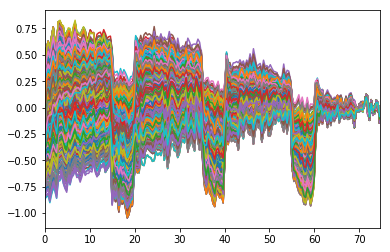

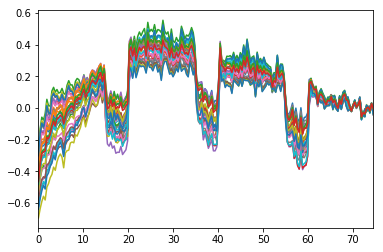

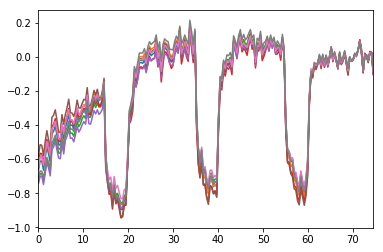

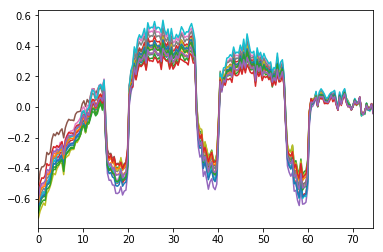

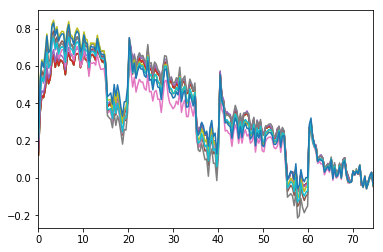

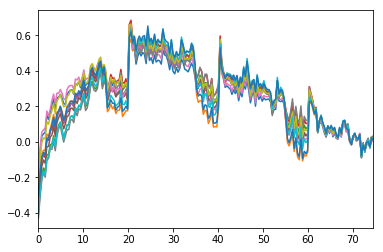

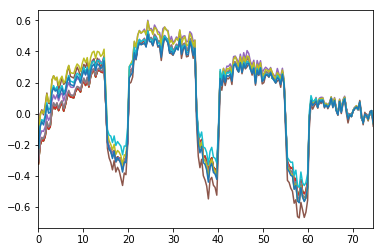

In [16]:
# graph results
for i in range(1, max(doutdf['out']) + 1):
    z = n.T[list(doutdf.loc[doutdf['out'] == i]['in'])].T
    z.T.plot(legend=False)